In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

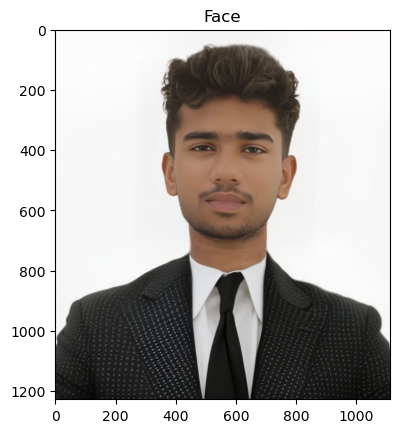

In [80]:
# Load the Face Image
faceImage = cv2.imread('myphoto.jpeg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")


In [81]:
faceImage.shape

(1228, 1112, 3)

In [82]:
#resized_faceImage.shape
faceImage.shape

(1228, 1112, 3)

Text(0.5, 1.0, 'glassPNG')

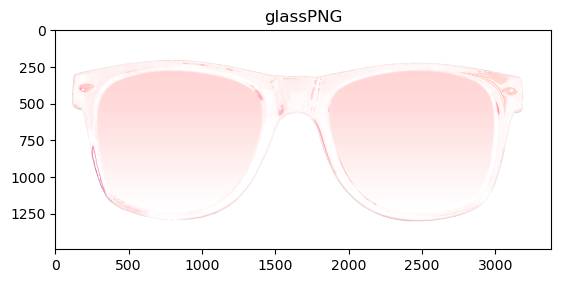

In [85]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread('glass2.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [86]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(190,50))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(50, 190, 4)


In [87]:
# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

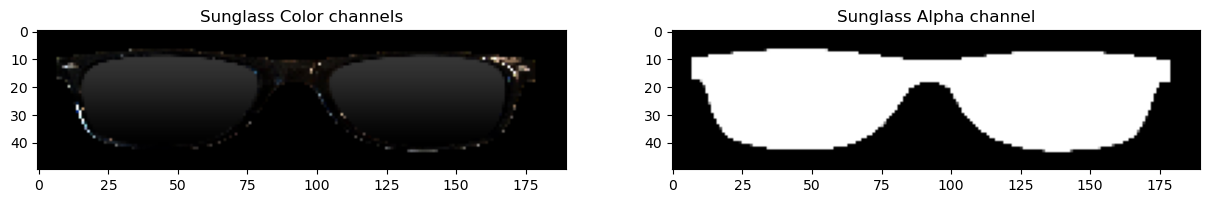

In [88]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

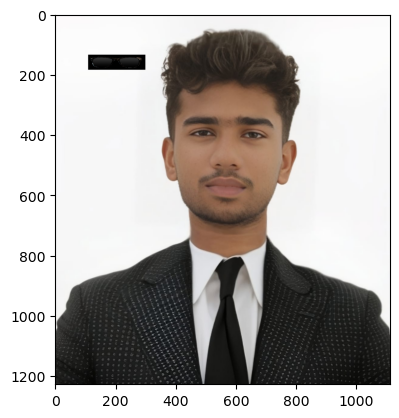

In [89]:
# Make a copy
#faceWithGlassesNaive = resized_faceImage.copy()
faceWithGlassesNaive = faceImage.copy()

# Replace the eye region with the sunglass image
faceWithGlassesNaive[135:185,110:300]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

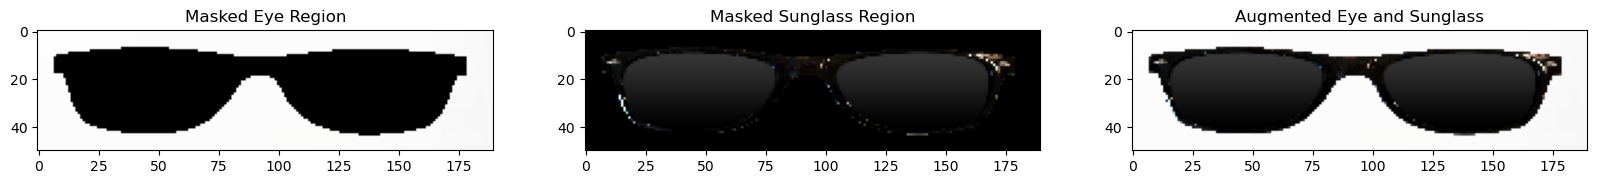

In [90]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Make the values [0,1] since we are using arithmetic operations
glassMask = np.uint8(glassMask/255)

# Make a copy
faceWithGlassesArithmetic = faceImage.copy()

# Get the eye region from the face image
eyeROI= faceWithGlassesArithmetic[135:185,110:300]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1-  glassMask ))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

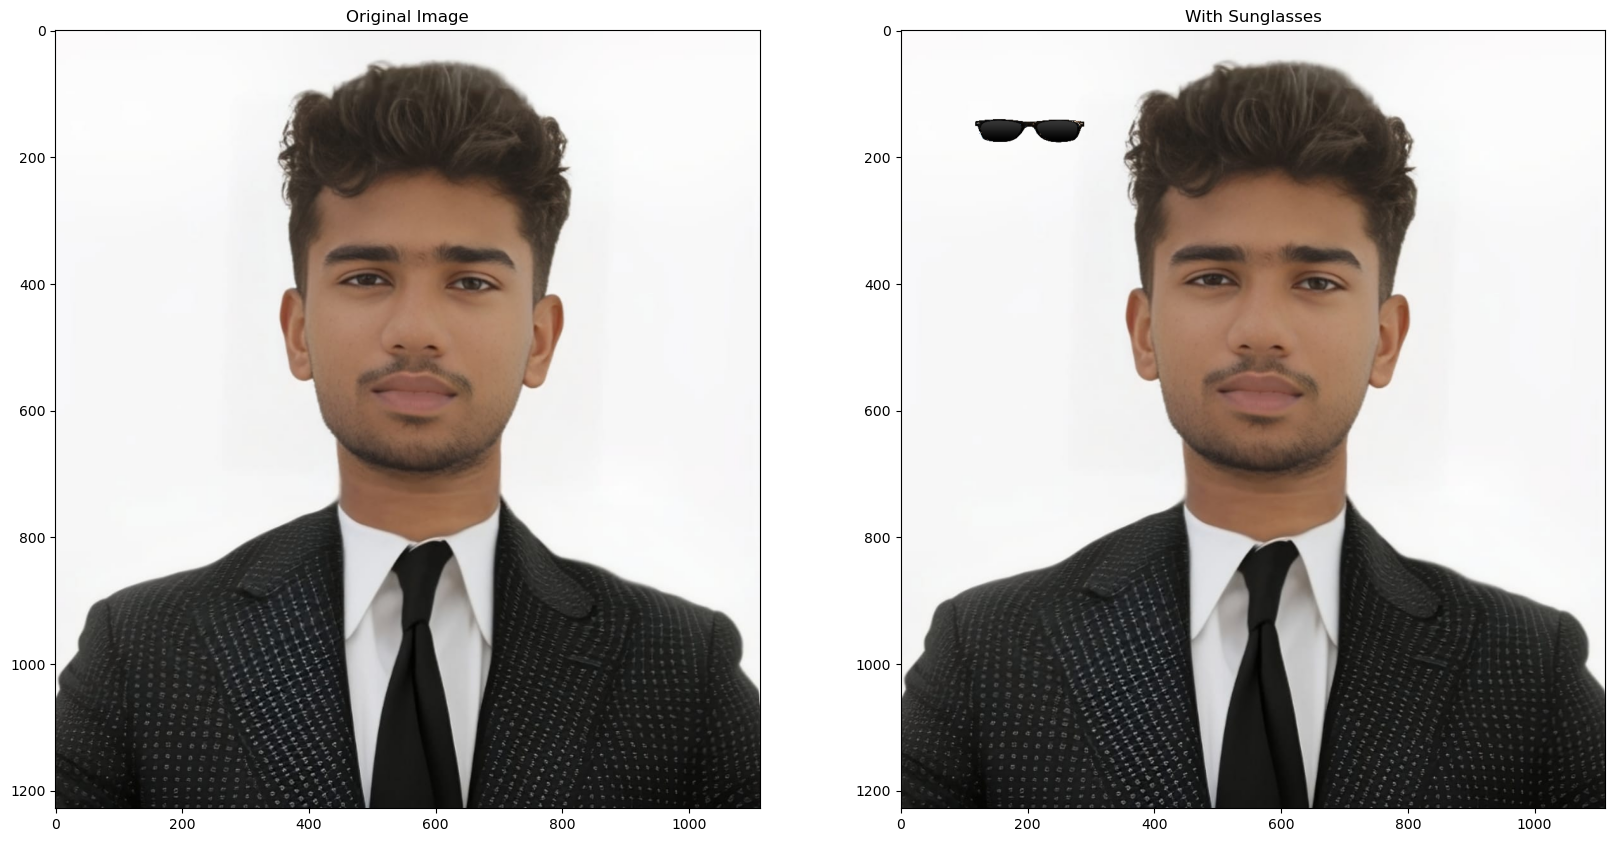

In [91]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[135:185,110:300]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");

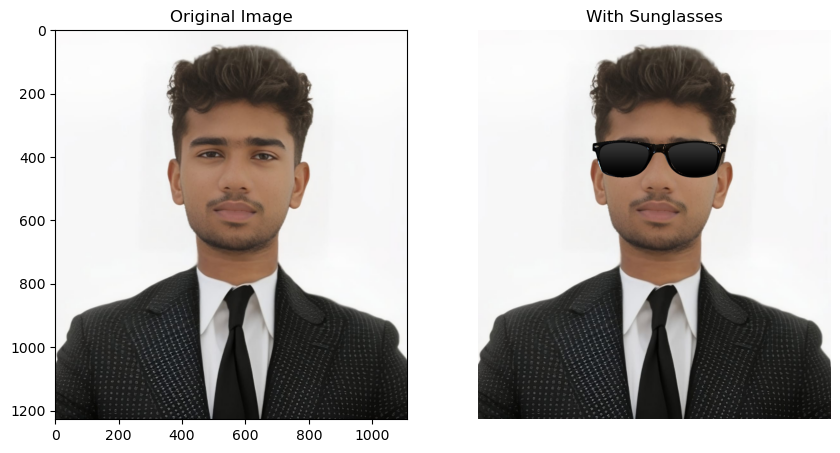

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load face image
faceImage = cv2.imread("myphoto.jpeg")
faceWithGlasses = faceImage.copy()

# Load glasses (PNG with transparency)
glasses = cv2.imread("glass2.png", cv2.IMREAD_UNCHANGED)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Convert to gray
gray = cv2.cvtColor(faceImage, cv2.COLOR_BGR2GRAY)

# Detect face
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    # ---- Glasses size based on face ----
    glasses_width = w
    glasses_height = int(w * 0.35)

    glasses_resized = cv2.resize(glasses, (glasses_width, glasses_height))

    # ---- Position (eye region) ----
    x1 = x
    y1 = y + int(h * 0.25)

    # Split channels
    b, g, r, a = cv2.split(glasses_resized)
    mask = a / 255.0

    gh, gw = glasses_resized.shape[:2]

    # Overlay glasses
    for c in range(3):
        faceWithGlasses[y1:y1+gh, x1:x1+gw, c] = (
            (1 - mask) * faceWithGlasses[y1:y1+gh, x1:x1+gw, c] +
            mask * glasses_resized[:, :, c]
        )

# Show result
plt.figure(figsize=(10,10))
plt.subplot(122);plt.imshow(faceWithGlasses[:,:,::-1]);plt.title("With Sunglasses");
plt.axis("off")
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.show()
